In [2]:
import pandas as pd
import numpy as np
import datetime

# Lab6

# 目標：groupby、corr、plt

# 預處理

## 請參考lab5爬取資料

### 請把date的資料型態更改為datetime，closing_price資料型態更改為float64

In [3]:
#參考lab5
data = pd.read_csv('./data_science_data.csv',index_col=0)
#提取資料
data = data[['date','證券名稱','收盤價']]
#更改名字
data = data.rename(columns = {'證券名稱':'name'})
data = data.rename(columns = {'收盤價':'closing_price'})
#清理資料
data['closing_price'] = data['closing_price'].replace({'\$':'', ',':'', '--':np.nan}, regex=True)
data = data.dropna()
#更改資料型態
data['closing_price'] = data['closing_price'].astype('float64')
data['date'] = pd.to_datetime(data['date'])

In [4]:
data.head(100)

,date,name,closing_price
0,2019-01-02,元大台灣50,74.05
1,2019-01-02,元大中型100,28.11
2,2019-01-02,富邦科技,47.60
3,2019-01-02,元大電子,30.53
4,2019-01-02,元大台商50,19.39
...,...,...,...
96,2019-01-02,富邦美國特別股,18.42
97,2019-01-02,第一金工業30,17.35
98,2019-01-02,第一金工業30反1,20.97
99,2019-01-02,富邦臺灣優質高息,17.16


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261818 entries, 0 to 1113
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           261818 non-null  datetime64[ns]
 1   name           261818 non-null  object        
 2   closing_price  261818 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 8.0+ MB


In [6]:
data.describe()

,date,closing_price
count,261818,261818.000000
mean,2019-07-07 18:48:25.817018112,48.057676
min,2019-01-02 00:00:00,0.110000
25%,2019-04-12 00:00:00,14.050000
50%,2019-07-09 00:00:00,24.350000
75%,2019-10-07 00:00:00,47.800000
max,2019-12-31 00:00:00,5060.000000
std,NaN,142.902039


## pd.groupby

對數據進行分組計算 (例如依不同區域/性別/年齡等進行不同群體分析)

In [7]:
data_group = data.groupby('name')

### get_group 提取資料

In [10]:
data_group.get_group('元大台灣50')

,date,name,closing_price
0,2019-01-02,元大台灣50,74.05
0,2019-01-03,元大台灣50,73.35
0,2019-01-04,元大台灣50,72.20
0,2019-01-07,元大台灣50,73.95
0,2019-01-08,元大台灣50,73.65
...,...,...,...
0,2019-12-25,元大台灣50,97.35
0,2019-12-26,元大台灣50,97.35
0,2019-12-27,元大台灣50,98.00
0,2019-12-30,元大台灣50,97.80


In [11]:
data_group.get_group('富邦金')

,date,name,closing_price
602,2019-01-02,富邦金,46.10
602,2019-01-03,富邦金,45.80
602,2019-01-04,富邦金,45.30
602,2019-01-07,富邦金,45.95
602,2019-01-08,富邦金,45.70
...,...,...,...
625,2019-12-25,富邦金,46.45
625,2019-12-26,富邦金,46.50
625,2019-12-27,富邦金,46.75
624,2019-12-30,富邦金,46.70


In [12]:
for (name, group) in data_group:
    print(name)
    print(group)

BP上證50
          date    name  closing_price
114 2019-01-02  BP上證50          84.55
114 2019-01-03  BP上證50          83.65
114 2019-01-04  BP上證50          85.30
114 2019-01-07  BP上證50          85.35
114 2019-01-08  BP上證50          85.25
..         ...     ...            ...
120 2019-12-25  BP上證50         106.40
120 2019-12-26  BP上證50         106.40
120 2019-12-27  BP上證50         107.10
119 2019-12-30  BP上證50         109.00
119 2019-12-31  BP上證50         109.00

[230 rows x 3 columns]
FH富時不動產
         date     name  closing_price
91 2019-01-02  FH富時不動產          17.22
91 2019-01-03  FH富時不動產          17.05
91 2019-01-04  FH富時不動產          17.27
91 2019-01-07  FH富時不動產          17.45
91 2019-01-08  FH富時不動產          17.56
..        ...      ...            ...
89 2019-12-25  FH富時不動產          18.41
89 2019-12-26  FH富時不動產          18.34
89 2019-12-27  FH富時不動產          18.43
88 2019-12-30  FH富時不動產          18.41
88 2019-12-31  FH富時不動產          18.18

[242 rows x 3 columns]
FH富時高息低波
          date  

          date name  closing_price
350 2019-01-02   允強          24.35
350 2019-01-03   允強          24.35
350 2019-01-04   允強          24.40
350 2019-01-07   允強          24.50
350 2019-01-08   允強          24.55
..         ...  ...            ...
373 2019-12-25   允強          25.90
373 2019-12-26   允強          25.90
373 2019-12-27   允強          26.00
372 2019-12-30   允強          26.05
372 2019-12-31   允強          26.00

[242 rows x 3 columns]
元大MSCI A股
          date       name  closing_price
107 2019-01-02  元大MSCI A股          16.30
107 2019-01-03  元大MSCI A股          16.30
107 2019-01-04  元大MSCI A股          16.61
107 2019-01-07  元大MSCI A股          16.74
107 2019-01-08  元大MSCI A股          16.75
..         ...        ...            ...
103 2019-12-25  元大MSCI A股          21.13
103 2019-12-26  元大MSCI A股          21.24
103 2019-12-27  元大MSCI A股          21.43
102 2019-12-30  元大MSCI A股          21.56
102 2019-12-31  元大MSCI A股          21.53

[242 rows x 3 columns]
元大MSCI台灣
         date      na

台郡
          date name  closing_price
919 2019-01-02   台郡           75.3
919 2019-01-03   台郡           70.6
919 2019-01-04   台郡           70.0
919 2019-01-07   台郡           71.0
920 2019-01-08   台郡           68.8
..         ...  ...            ...
953 2019-12-25   台郡          112.5
953 2019-12-26   台郡          111.5
953 2019-12-27   台郡          113.0
952 2019-12-30   台郡          110.5
952 2019-12-31   台郡          114.5

[242 rows x 3 columns]
台開
          date name  closing_price
593 2019-01-02   台開           8.13
593 2019-01-03   台開           8.15
593 2019-01-04   台開           8.11
593 2019-01-07   台開           8.15
593 2019-01-08   台開           8.15
..         ...  ...            ...
616 2019-12-25   台開           8.97
616 2019-12-26   台開           9.04
616 2019-12-27   台開           9.16
615 2019-12-30   台開           9.18
615 2019-12-31   台開           8.98

[242 rows x 3 columns]
台驊投控
          date  name  closing_price
566 2019-01-02  台驊投控          24.40
566 2019-01-03  台驊投控         

          date name  closing_price
321 2019-01-02   士紙          29.90
321 2019-01-03   士紙          29.90
321 2019-01-04   士紙          30.25
321 2019-01-07   士紙          30.10
321 2019-01-08   士紙          29.80
..         ...  ...            ...
343 2019-12-25   士紙          33.00
343 2019-12-26   士紙          32.95
343 2019-12-27   士紙          32.95
342 2019-12-30   士紙          33.25
342 2019-12-31   士紙          33.90

[239 rows x 3 columns]
士電
          date name  closing_price
224 2019-01-02   士電          40.55
224 2019-01-03   士電          40.40
224 2019-01-04   士電          40.40
224 2019-01-07   士電          40.60
224 2019-01-08   士電          40.30
..         ...  ...            ...
246 2019-12-25   士電          45.85
246 2019-12-26   士電          45.55
246 2019-12-27   士電          45.50
245 2019-12-30   士電          45.50
245 2019-12-31   士電          45.25

[242 rows x 3 columns]
夆典
          date name  closing_price
681 2019-01-02   夆典           8.57
681 2019-01-03   夆典           8.55
6

          date name  closing_price
689 2019-01-02   建漢          15.35
689 2019-01-03   建漢          15.05
689 2019-01-04   建漢          14.90
689 2019-01-07   建漢          15.40
690 2019-01-08   建漢          15.20
..         ...  ...            ...
716 2019-12-25   建漢          18.45
716 2019-12-26   建漢          18.30
716 2019-12-27   建漢          18.35
715 2019-12-30   建漢          18.40
715 2019-12-31   建漢          18.30

[242 rows x 3 columns]
建碁
          date name  closing_price
675 2019-01-02   建碁          18.60
675 2019-01-03   建碁          18.75
675 2019-01-04   建碁          18.40
675 2019-01-07   建碁          18.70
676 2019-01-08   建碁          18.90
..         ...  ...            ...
702 2019-12-25   建碁          16.65
702 2019-12-26   建碁          16.40
702 2019-12-27   建碁          16.65
701 2019-12-30   建碁          16.60
701 2019-12-31   建碁          16.45

[242 rows x 3 columns]
建通
          date name  closing_price
487 2019-01-02   建通           9.65
487 2019-01-03   建通           9.65
4

          date name  closing_price
476 2019-01-02   晶電          25.25
476 2019-01-03   晶電          24.60
476 2019-01-04   晶電          23.85
476 2019-01-07   晶電          24.50
476 2019-01-08   晶電          24.00
..         ...  ...            ...
500 2019-12-25   晶電          31.95
500 2019-12-26   晶電          33.45
500 2019-12-27   晶電          32.80
499 2019-12-30   晶電          32.30
499 2019-12-31   晶電          32.35

[242 rows x 3 columns]
智伸科
          date name  closing_price
792 2019-01-02  智伸科          107.0
792 2019-01-03  智伸科          106.0
792 2019-01-04  智伸科          106.0
792 2019-01-07  智伸科          105.0
793 2019-01-08  智伸科          102.5
..         ...  ...            ...
820 2019-12-25  智伸科          167.5
820 2019-12-26  智伸科          169.0
820 2019-12-27  智伸科          173.0
819 2019-12-30  智伸科          171.0
819 2019-12-31  智伸科          173.5

[242 rows x 3 columns]
智原
          date name  closing_price
665 2019-01-02   智原          42.60
665 2019-01-03   智原          40.65


瑞祺電通
          date  name  closing_price
934 2019-01-02  瑞祺電通           90.6
934 2019-01-03  瑞祺電通           90.6
934 2019-01-04  瑞祺電通           88.2
934 2019-01-07  瑞祺電通           89.2
935 2019-01-08  瑞祺電通           87.5
..         ...   ...            ...
968 2019-12-25  瑞祺電通           95.5
968 2019-12-26  瑞祺電通           95.4
968 2019-12-27  瑞祺電通           96.1
967 2019-12-30  瑞祺電通           97.5
967 2019-12-31  瑞祺電通           96.1

[242 rows x 3 columns]
瑞軒
          date name  closing_price
510 2019-01-02   瑞軒          11.20
510 2019-01-03   瑞軒          11.35
510 2019-01-04   瑞軒          11.40
510 2019-01-07   瑞軒          11.65
510 2019-01-08   瑞軒          11.55
..         ...  ...            ...
533 2019-12-25   瑞軒          10.70
533 2019-12-26   瑞軒          10.70
533 2019-12-27   瑞軒          10.65
532 2019-12-30   瑞軒          10.65
532 2019-12-31   瑞軒          10.65

[242 rows x 3 columns]
環泥
          date name  closing_price
125 2019-01-02   環泥          18.90
125 2019-01-03   環泥

          date name  closing_price
223 2019-01-02   聚陽          174.5
223 2019-01-03   聚陽          179.0
223 2019-01-04   聚陽          180.0
223 2019-01-07   聚陽          182.5
223 2019-01-08   聚陽          178.5
..         ...  ...            ...
245 2019-12-25   聚陽          159.0
245 2019-12-26   聚陽          157.5
245 2019-12-27   聚陽          158.0
244 2019-12-30   聚陽          157.5
244 2019-12-31   聚陽          157.5

[242 rows x 3 columns]
聚隆
          date name  closing_price
213 2019-01-02   聚隆          10.15
213 2019-01-03   聚隆          10.05
213 2019-01-04   聚隆          10.00
213 2019-01-07   聚隆           9.95
213 2019-01-08   聚隆           9.80
..         ...  ...            ...
235 2019-12-24   聚隆           7.59
235 2019-12-25   聚隆           7.71
235 2019-12-27   聚隆           7.65
234 2019-12-30   聚隆           7.60
234 2019-12-31   聚隆           7.56

[234 rows x 3 columns]
聚鼎
          date name  closing_price
910 2019-01-02   聚鼎           54.5
910 2019-01-03   聚鼎           54.7
9

          date name  closing_price
575 2019-01-02  遠雄來           43.0
575 2019-01-03  遠雄來           38.9
575 2019-01-04  遠雄來           39.4
575 2019-01-07  遠雄來           40.0
575 2019-01-08  遠雄來           39.9
..         ...  ...            ...
598 2019-12-25  遠雄來           51.5
598 2019-12-26  遠雄來           51.7
598 2019-12-27  遠雄來           52.0
597 2019-12-30  遠雄來           52.1
597 2019-12-31  遠雄來           54.0

[224 rows x 3 columns]
遠雄港
          date name  closing_price
862 2019-01-02  遠雄港          17.95
862 2019-01-03  遠雄港          17.90
862 2019-01-04  遠雄港          17.95
862 2019-01-07  遠雄港          18.25
863 2019-01-08  遠雄港          18.20
..         ...  ...            ...
895 2019-12-25  遠雄港          25.85
895 2019-12-26  遠雄港          25.70
895 2019-12-27  遠雄港          25.90
894 2019-12-30  遠雄港          26.10
894 2019-12-31  遠雄港          25.95

[242 rows x 3 columns]
鄉林
          date name  closing_price
858 2019-01-02   鄉林          10.15
858 2019-01-03   鄉林          10.25


### 以組進行計算資料筆數總量 (.count)

In [13]:
data_group.count().head(10)

,date,closing_price
name,,
BP上證50,230,230
FH富時不動產,242,242
FH富時高息低波,221,221
FH彭博新興債,242,242
FH彭博高收益債,242,242
FH滬深,242,242
FH美國金融股,224,224
FH香港,240,240
FH香港反1,242,242


### 以組進行計算每一組別的總和、平均等統計資訊 (.sum , .mean)

In [14]:
data_group.closing_price.sum().head(10)

name
BP上證50      23863.65
FH富時不動產      4410.58
FH富時高息低波    10785.16
FH彭博新興債      5179.00
FH彭博高收益債     5007.56
FH滬深         5558.66
FH美國金融股      4896.79
FH香港         5008.61
FH香港反1       2027.52
FH香港正2       7237.76
Name: closing_price, dtype: float64

In [15]:
data_group.closing_price.mean().head(10)

name
BP上證50      103.755000
FH富時不動產      18.225537
FH富時高息低波     48.801629
FH彭博新興債      21.400826
FH彭博高收益債     20.692397
FH滬深         22.969669
FH美國金融股      21.860670
FH香港         20.869208
FH香港反1        8.378182
FH香港正2       29.908099
Name: closing_price, dtype: float64

### 針對特定組別進行分析 (.get_group)

In [16]:
data_group.get_group('中信金').closing_price.mean()

20.958264462809915

In [17]:
data[data['name']=='中信金'].closing_price.mean()

20.958264462809915

In [18]:
data_group.get_group('國泰金').closing_price.mean()

42.4650826446281

In [19]:
data[data['name']=='國泰金'].closing_price.mean()

42.4650826446281

### 以組進行describe()

In [20]:
data_group.closing_price.describe().head()

,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
BP上證50,230.0,103.755000,6.146488,83.65,102.2625,105.425,107.7875,112.80
FH富時不動產,242.0,18.225537,0.445537,17.05,17.9000,18.305,18.5700,19.25
FH富時高息低波,221.0,48.801629,0.998314,45.50,48.1200,48.800,49.5100,50.70
FH彭博新興債,242.0,21.400826,1.221931,18.84,20.4100,21.700,22.2800,23.71
FH彭博高收益債,242.0,20.692397,0.304929,19.63,20.5300,20.735,20.9100,21.25


## corr 相關係數

### 0.1 <= |ans| <0.3 相關度:低
### 0.3 <= |ans| <0.5 相關度:中
### 0.5 <= |ans| <1.0 相關度:高

In [21]:
#提出中信金與國泰金資料
data_CH = data[data['name']=='中信金'].reset_index(drop=True)
data_KT = data[data['name']=='國泰金'].reset_index(drop=True)

In [37]:
data_CH.head()

,date,name,closing_price
0,2019-01-02,中信金,19.90
1,2019-01-03,中信金,20.00
2,2019-01-04,中信金,19.80
3,2019-01-07,中信金,20.10
4,2019-01-08,中信金,19.95


In [22]:
data_CH.count()

date             242
name             242
closing_price    242
dtype: int64

In [23]:
data_KT.head()

,date,name,closing_price
0,2019-01-02,國泰金,45.90
1,2019-01-03,國泰金,45.15
2,2019-01-04,國泰金,44.55
3,2019-01-07,國泰金,45.20
4,2019-01-08,國泰金,45.15


In [24]:
data_KT.count()

date             242
name             242
closing_price    242
dtype: int64

In [25]:
data_CH['closing_price'].corr(data_KT['closing_price']) ## 計算兩支股票的相關係數

-0.040024190759576236

### 計算所有公司與中信金的相關度

In [27]:
#需15秒

#製作一個新的dataframe，可以儲存與中信金進行相關度分析的資料
data_CH_corr_company = pd.DataFrame()
#製作所有上市公司的list，方法 : 將data的name這個columns刪除重複項即可
companies = data['name'].drop_duplicates()
data_CH_corr_company['company'] = companies
data_CH_corr_company['corr'] = 0

#使用apply遍歷所有公司與中信金相關度的分析
def get_corr(x):
    data_company = data[data['name']==x].reset_index(drop=True)
    return data_CH['closing_price'].corr(data_company['closing_price'])

data_CH_corr_company['corr'] = data_CH_corr_company['company'].apply(get_corr)

In [28]:
#排序過後的相關度dataframe
data_CH_corr_company.sort_values('corr',ascending = False)

,company,corr
617,中信金,1.000000
864,鳳凰,0.860940
486,敦吉,0.847900
597,中再保,0.844067
325,永豐餘,0.834481
...,...,...
634,新光金甲特,-0.761325
78,兆豐藍籌30反1,-0.791579
48,國泰日本反1,-0.801632
29,富邦日本反1,-0.809789


In [29]:
#絕對值並排續後的相關度dataframe
data_CH_corr_company['corr'] = data_CH_corr_company['corr'].abs()
data_CH_corr_company.sort_values('corr',ascending = False)

,company,corr
617,中信金,1.000000
128,國泰US短期公債,0.868759
864,鳳凰,0.860940
486,敦吉,0.847900
597,中再保,0.844067
...,...,...
96,富邦美國特別股,0.004113
300,毛寶,0.002086
782,佐登-KY,0.001324
898,巨路,0.001162


# matplotlib.pyplot

In [30]:
import matplotlib.pyplot as plt

In [31]:
#將中信金與國泰金merge起來，請參考lab5
data_CH_KT = pd.merge(data_CH[['date','closing_price']],data_KT[['date','closing_price']],on='date',suffixes=('_CH', '_KT')).set_index('date')

In [32]:
data_CH_KT

,closing_price_CH,closing_price_KT
date,,
2019-01-02,19.90,45.90
2019-01-03,20.00,45.15
2019-01-04,19.80,44.55
2019-01-07,20.10,45.20
2019-01-08,19.95,45.15
...,...,...
2019-12-25,22.45,42.60
2019-12-26,22.45,42.65
2019-12-27,22.50,42.70


## plt.plot

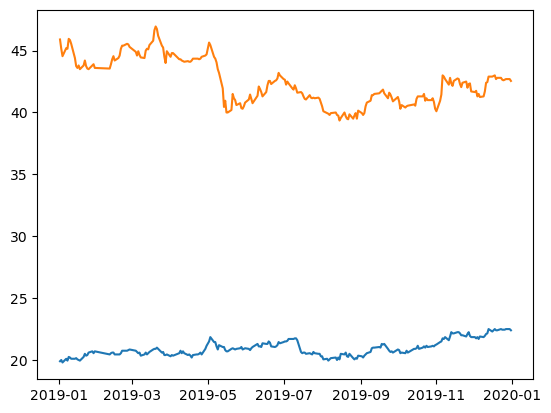

In [33]:
plt.plot(data_CH_KT['closing_price_CH'],label='CH')
plt.plot(data_CH_KT['closing_price_KT'],label='KT')
plt.show()

### 設定坐標軸與標題名稱

### xlabel、ylabe、title

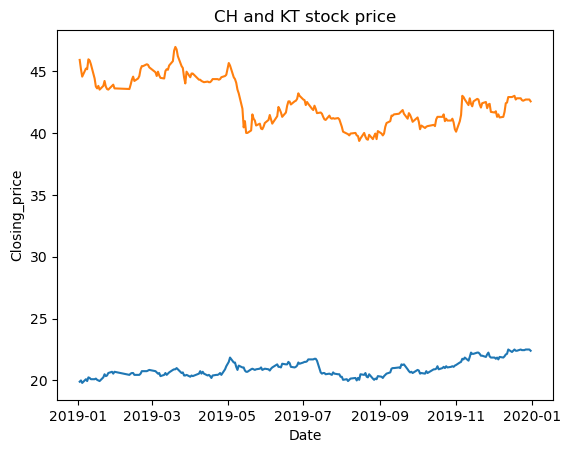

In [34]:
plt.plot(data_CH_KT['closing_price_CH'],label='CH')
plt.plot(data_CH_KT['closing_price_KT'],label='KT')
#x坐標軸
plt.xlabel("Date")
#y坐標軸
plt.ylabel("Closing_price")
#標題
plt.title("CH and KT stock price")
plt.show()

### 設定大小

### figure(figsize(x,y))

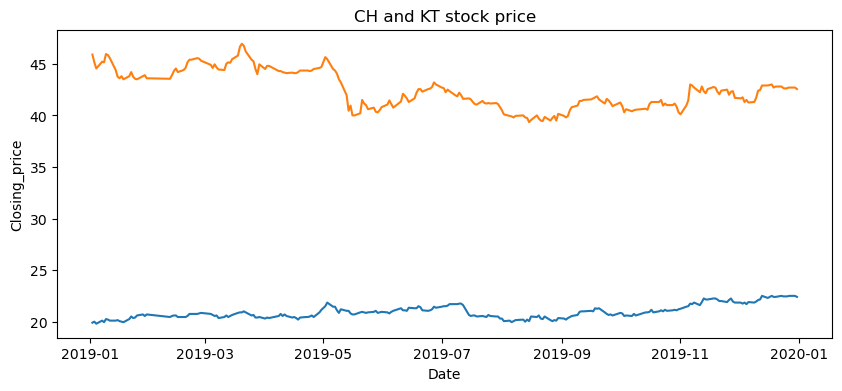

In [35]:
#設定大小
plt.figure(figsize=(10,4))
plt.plot(data_CH_KT['closing_price_CH'],label='CH')
plt.plot(data_CH_KT['closing_price_KT'],label='KT')
plt.xlabel("Date")
plt.ylabel("Closing_price")
plt.title("CH and KT stock price")
plt.show()

### 設定坐標軸刻度

### xticks、yticks

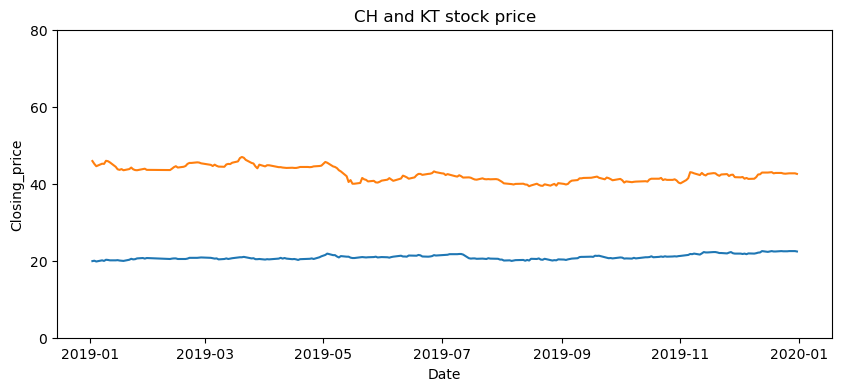

In [36]:
plt.figure(figsize=(10,4))
plt.plot(data_CH_KT['closing_price_CH'],label='CH')
plt.plot(data_CH_KT['closing_price_KT'],label='KT')
#設定刻度
plt.yticks(np.arange(0, 100, 20))
plt.xlabel("Date")
plt.ylabel("Closing_price")
plt.title("CH and KT stock price")
plt.show()

### 設定圖例

### legend()

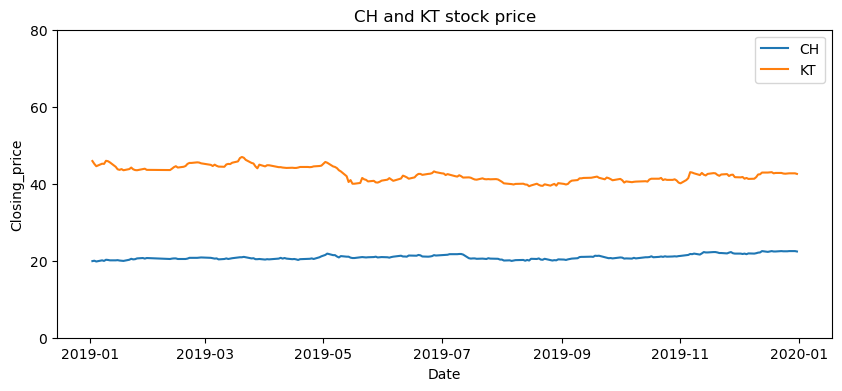

In [37]:
plt.figure(figsize=(10,4))
plt.plot(data_CH_KT['closing_price_CH'],label='CH')
plt.plot(data_CH_KT['closing_price_KT'],label='KT')
plt.legend(loc='best')
plt.yticks(np.arange(0, 100, 20))
plt.xlabel("Date")
plt.ylabel("Closing_price")
plt.title("CH and KT stock price")
plt.show()

### 設定顏色

### color

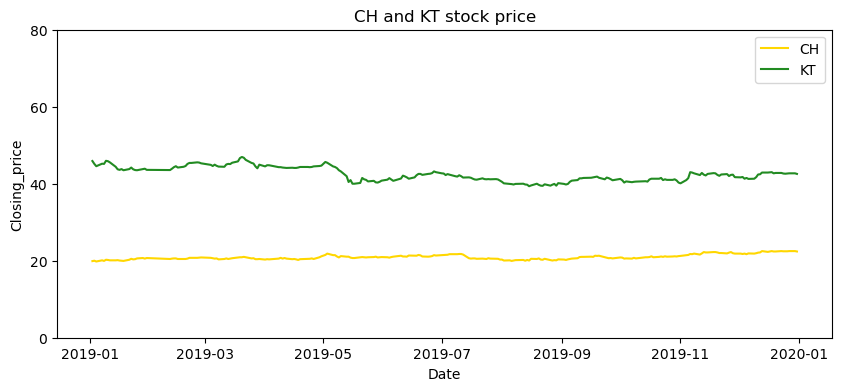

In [38]:
plt.figure(figsize=(10,4))
plt.plot(data_CH_KT['closing_price_CH'],label='CH',color='gold')
plt.plot(data_CH_KT['closing_price_KT'],label='KT',color='forestgreen')
plt.legend(loc='best')
plt.yticks(np.arange(0, 100, 20))
plt.xlabel("Date")
plt.ylabel("Closing_price")
plt.title("CH and KT stock price")
plt.show()

## 作業三 (due 4/19/2024)


## 1. 請計算　台積電、聯發科和聯電　2023年的股價平均值?

## 2. 請分析2023/1/1-2023/12/31期間與台積電絕對值相關度排行第5名的股票是哪一支股票？劃出這兩支股票的股價圖表 (圖表必須包含圖例、座標軸名稱、標題、大小為(7,7))